# PRACTICAL 1:
<h4>Use pytesseract library in Python for optical character recognition from </h4> 
<ol>
    <li>an image file</li>
    <li>a multi-page pdf file</li>
</ol>  


### OCR using an image file

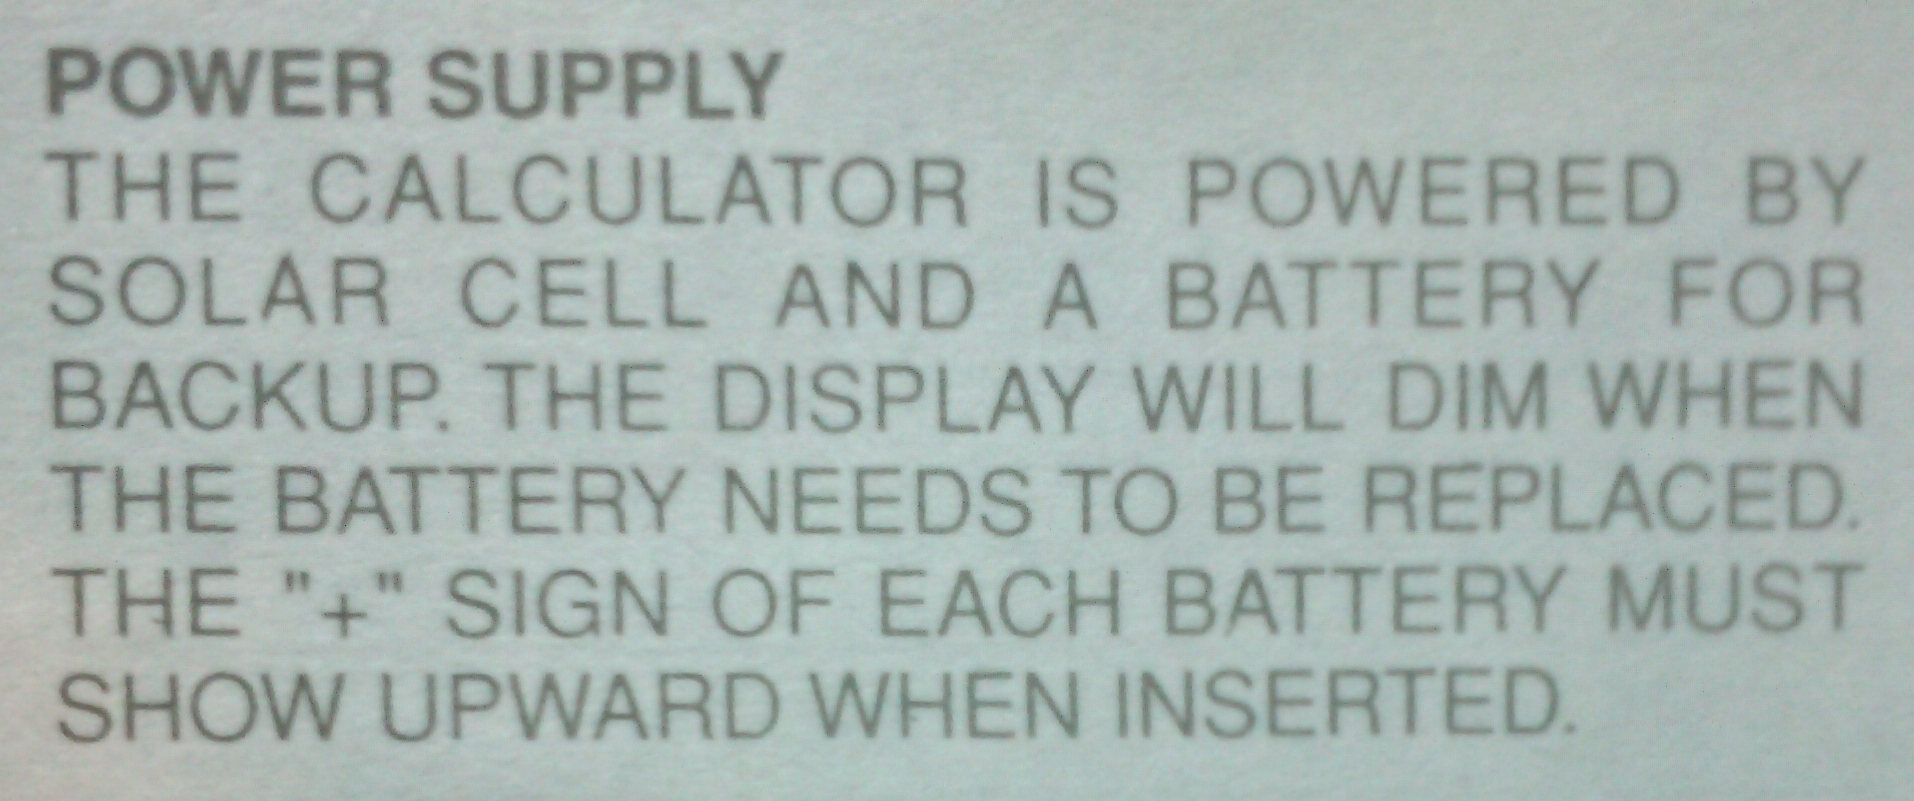

Recognized Text from Image:
 POWER SUPPLY

THE CALCULATOR IS POWERED BY
SOLAR CELL AND A BATTERY FOR
BACKUP. THE DISPLAY WILL DIM WHEN
THE BATTERY NEEDS TO BE REPLACED.
THE "+" SIGN OF EACH BATTERY MUST
SHOW UPWARD WHEN INSERTED. ~



In [5]:
from PIL import Image
import pytesseract

# Load image
image_path = 'text.jpg'
image = Image.open(image_path)

display(image)

# Perform OCR on the image
text = pytesseract.image_to_string(image)

# Output the recognized text
print("Recognized Text from Image:\n", text)


### OCR using a PDF File

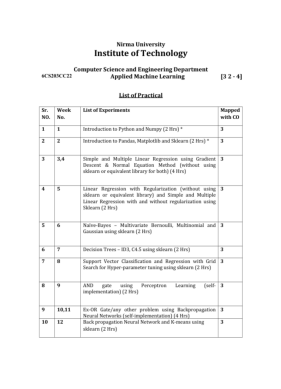

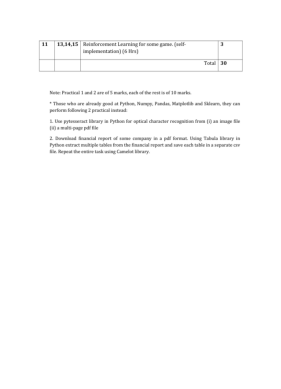



Extracted Text from PDF:
 Page 1:
Nirma University

Institute of Technology

Computer Science and Engineering Department

 

 

 

 

 

 

 

 

 

 

 

 

6CS203CC22 Applied Machine Learning [3 2-4]
List of Practical

Sr. | Week List of Experiments Mapped

NO. | No. with CO

1 1 Introduction to Python and Numpy (2 Hrs) * 3

2 2 Introduction to Pandas, Matplotlib and Sklearn (2 Hrs) * 3

3 3,4 Simple and Multiple Linear Regression using Gradient | 3
Descent & Normal Equation Method (without using
sklearn or equivalent library for both) (4 Hrs)

4 5 Linear Regression with Regularization (without using | 3
sklearn or equivalent library) and Simple and Multiple
Linear Regression with and without regularization using
Sklearn (2 Hrs)

5 6 Naive-Bayes - Multivariate Bernoulli, Multinomial and | 3
Gaussian using sklearn (2 Hrs)

6 7 Decision Trees - ID3, C4.5 using sklearn (2 Hrs) 3

7 8 Support Vector Classification and Regression with Grid | 3
Search for Hyper-parameter tuning using skl

In [8]:
import fitz  # PyMuPDF
from PIL import Image
import pytesseract
from pdf2image import convert_from_path
import matplotlib.pyplot as plt

# Function to display the PDF pages as images
def display_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    for page_number in range(len(doc)):
        page = doc.load_page(page_number)
        pix = page.get_pixmap()
        img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
        
        # Display the page using matplotlib
        plt.imshow(img)
        plt.axis('off')  # Hide axis
        plt.show()

# Function to perform OCR on the PDF pages
def ocr_from_pdf(pdf_path):
    # Convert PDF pages to images
    pages = convert_from_path(pdf_path)
    
    # Perform OCR on each page
    pdf_text = ""
    for page_number, page in enumerate(pages):
        page_text = pytesseract.image_to_string(page)
        pdf_text += f"Page {page_number + 1}:\n{page_text}\n\n"
    
    return pdf_text

# Path to your PDF
pdf_path = 'lop.pdf'

# Step 1: Display the PDF pages
display_pdf(pdf_path)

# Step 2: Extract text from the PDF after displaying it
print("\n=========================================================================================================================\n")

extracted_text = ocr_from_pdf(pdf_path)

# Output the recognized text
print("Extracted Text from PDF:\n", extracted_text)

print("=========================================================================================================================\n")
